In [2]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist






In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

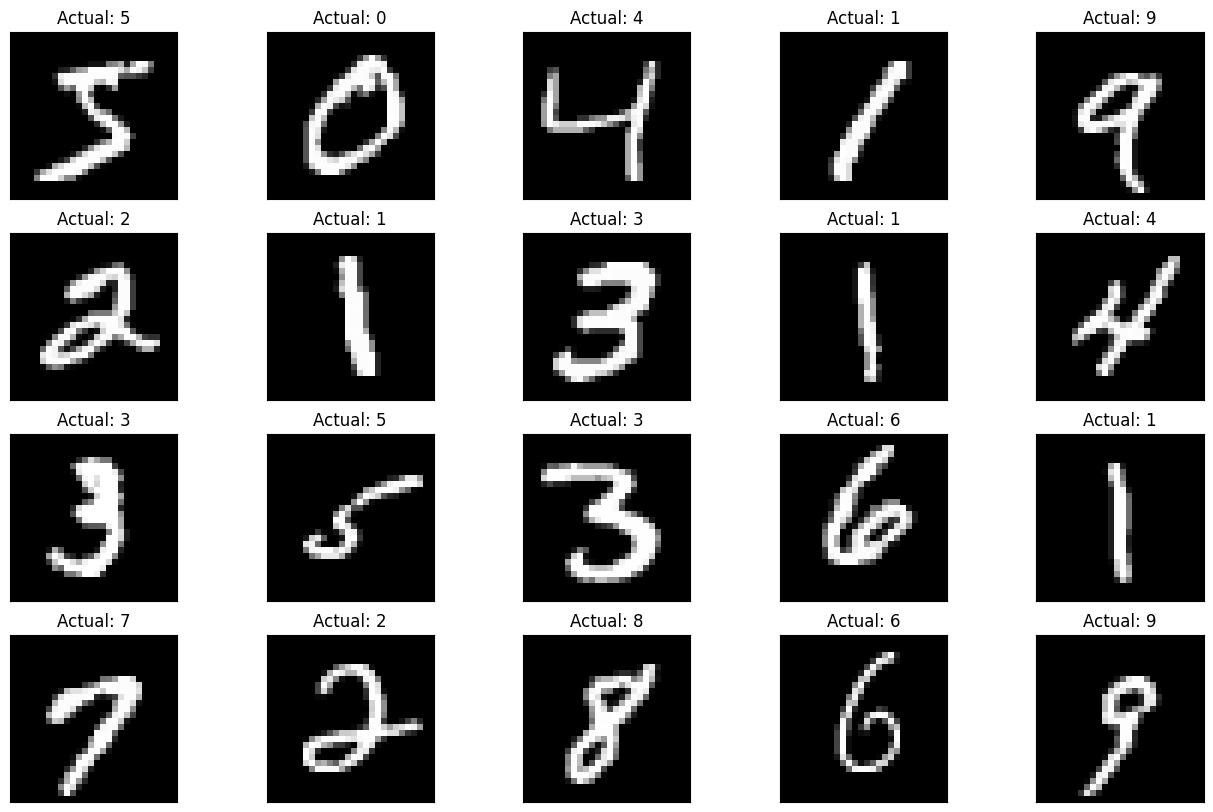

In [24]:
plt.figure(figsize=(16, 10))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.title(f"Actual: {y_train[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [12]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [14]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8629 - loss: 0.4486
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9755 - loss: 0.0809
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9858 - loss: 0.0484
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9901 - loss: 0.0320
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.9925 - loss: 0.0255
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9944 - loss: 0.0184
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9964 - loss: 0.0134
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9974 - loss: 0.0096
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9983 - loss: 0.0070
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - accuracy: 0.9991 - loss: 0.0043


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


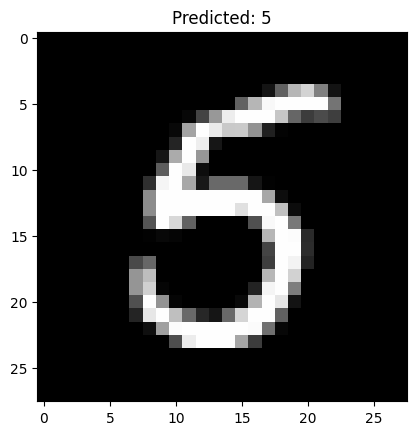

In [15]:
predictions = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Test Accuracy: 0.9861


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


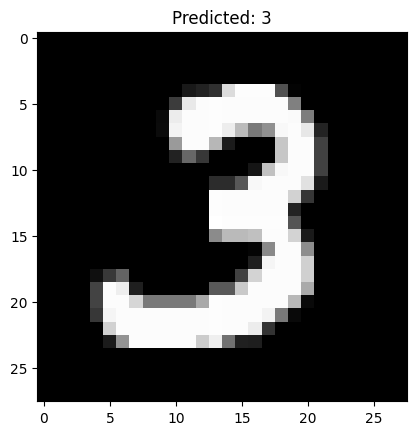

In [28]:
n = random.randint(0, X_test.shape[0] - 1)
plt.imshow(X_test[n].squeeze(), cmap='gray')
plt.title(f"Predicted: {np.argmax(model.predict(X_test[n].reshape((1, 28, 28, 1))))}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


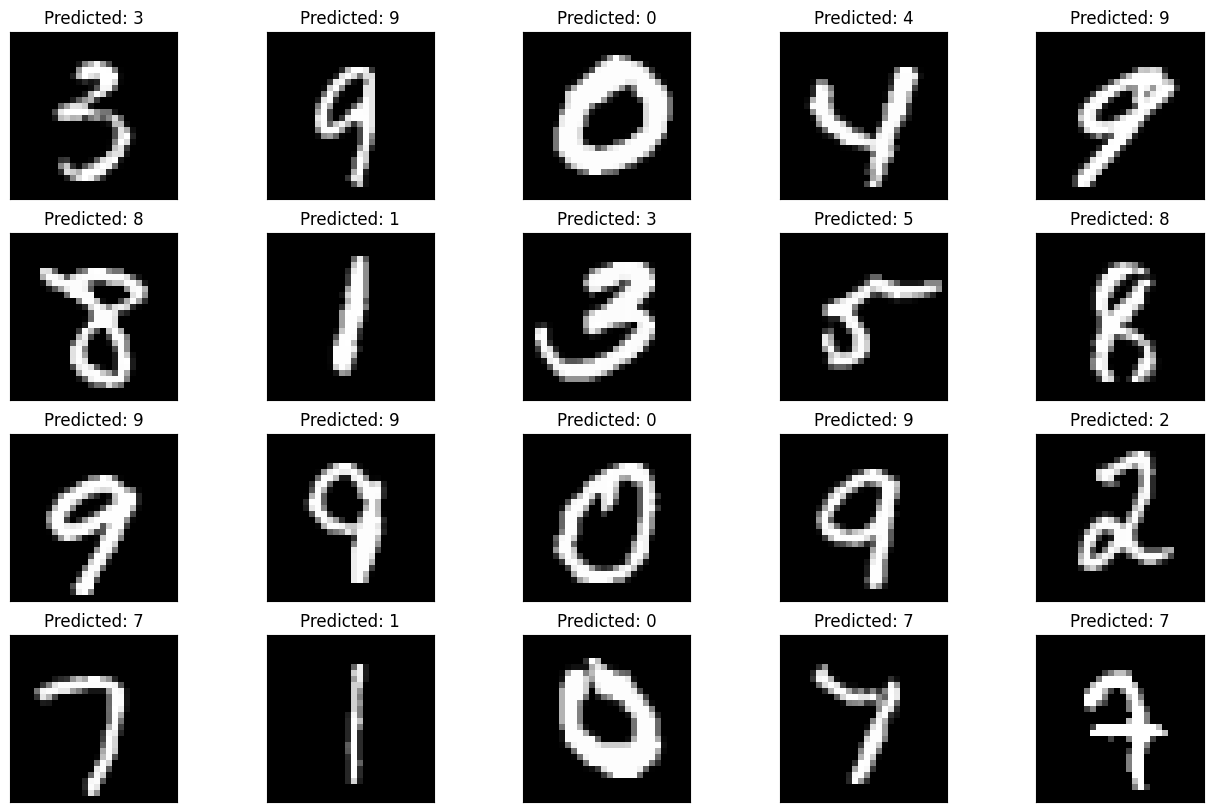

In [31]:
plt.figure(figsize=(16, 10))
for i in range(20):
    index = random.randint(0, X_test.shape[0] - 1)
    image = X_test[index].squeeze()
    predicted_label = np.argmax(model.predict(image.reshape((1, 28, 28, 1))), axis=-1)
    plt.subplot(4, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Predicted: {predicted_label[0]}")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [26]:
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9831 - loss: 0.0618
Test Loss: 0.04798893630504608
Test Accuracy: 0.9861000180244446
